In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

from matplotlib import gridspec
from numba import njit, prange
from pyts.image import MarkovTransitionField


In [2]:
tag_df = pd.read_csv('../data/signal-1-for-mtf.csv')
tag_df.head(3)

,timestamp,value
0,2017-07-01 00:00:00,141.221088
1,2017-07-01 01:00:00,145.801993
2,2017-07-01 02:00:00,141.738005


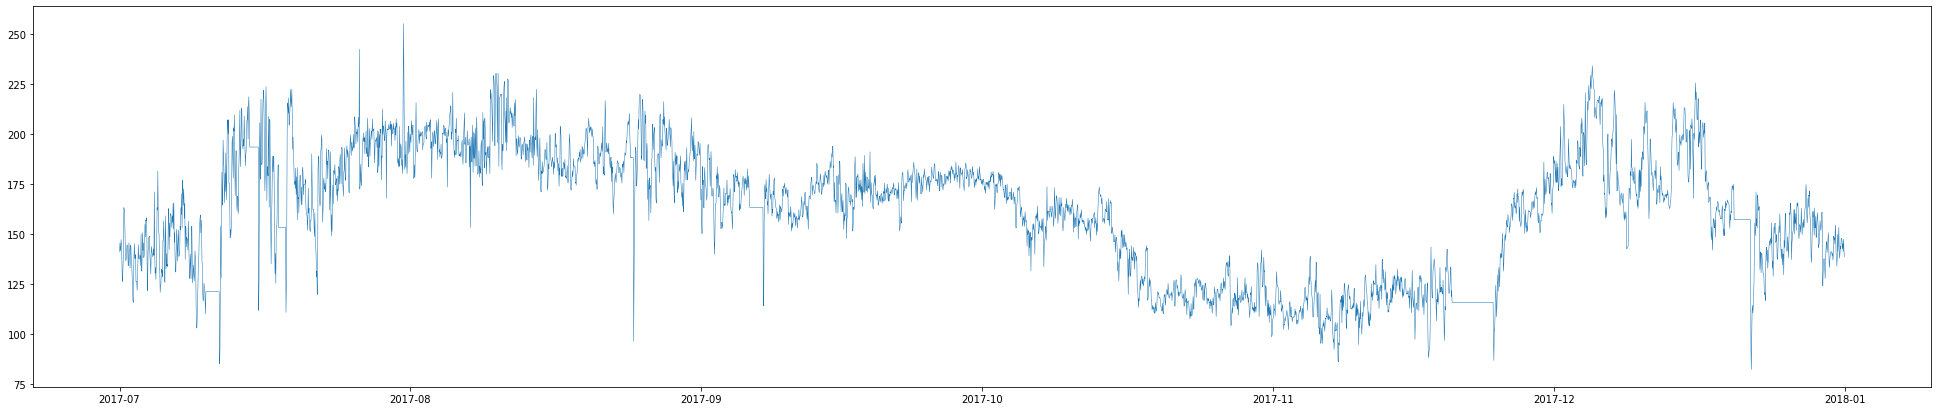

In [3]:
tag_df["timestamp"] = pd.to_datetime(tag_df["timestamp"], format="%Y-%m-%dT%H:%M:%S.%f")
tag_df = tag_df.set_index("timestamp")
fig = plt.figure(figsize=(34,7))
plt.plot(tag_df, linewidth=0.5)
plt.show()

In [4]:
tag_df['value'].min(), tag_df['value'].max()

(82.43188450000002, 255.37814500000005)

In [5]:
from tsia import markov, plot, network_graph

In [6]:
X_binned, bin_edges = markov.discretize(tag_df)

In [7]:
X_binned

array([2, 2, 2, ..., 2, 2, 2])

In [19]:
bin_edges

array([ 82.4318845 , 118.41579271, 137.42079667, 156.7783225 ,
       166.35528917, 175.224915  , 183.85208333, 196.53184021,
       255.378145  ])

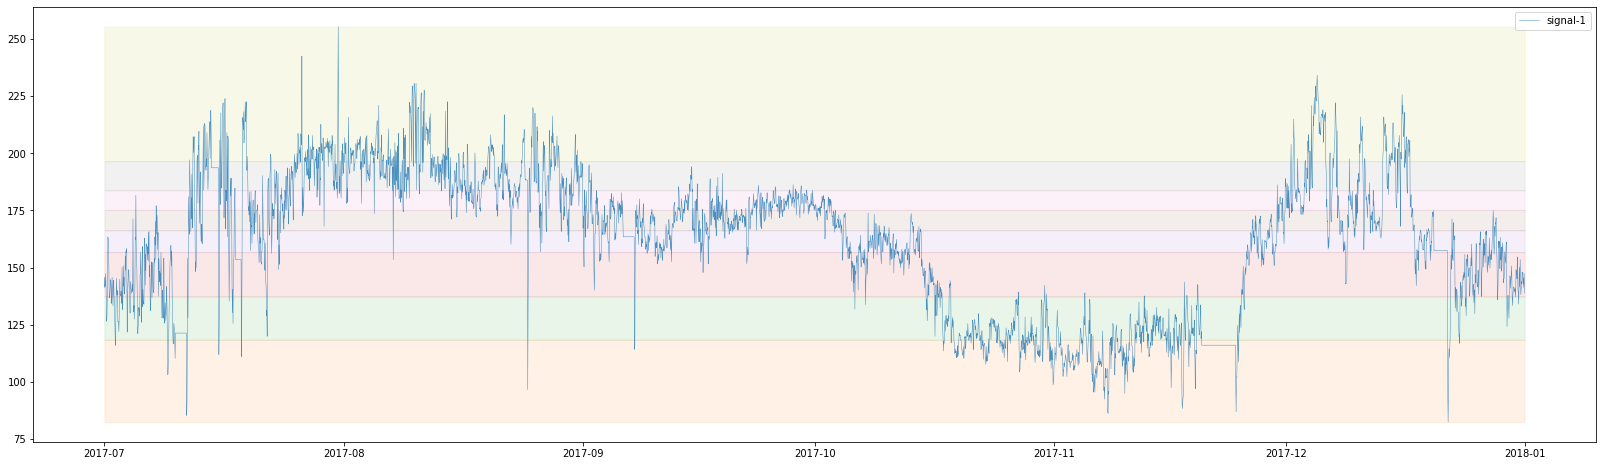

In [25]:
plot.plot_timeseries_quantiles(tag_df, bin_edges, label='signal-1')
plt.legend()

In [26]:
X_mtm = markov.markov_transition_matrix(X_binned)
X_mtm

array([[465.,  86.,   1.,   0.,   0.,   0.,   0.,   0.],
       [ 80., 405.,  63.,   2.,   0.,   2.,   0.,   0.],
       [  3.,  59., 379.,  96.,   9.,   2.,   2.,   1.],
       [  2.,   2.,  94., 352.,  75.,  19.,   6.,   2.],
       [  0.,   0.,  12.,  89., 314., 110.,  23.,   4.],
       [  0.,   0.,   0.,   9., 125., 312.,  86.,  20.],
       [  2.,   0.,   2.,   4.,  21.,  89., 320., 114.],
       [  0.,   0.,   0.,   0.,   8.,  18., 115., 411.]])

In [27]:
X_mtm = markov.markov_transition_probabilities(X_mtm)
np.round(X_mtm * 100, 1)

array([[84.2, 15.6,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [14.5, 73.4, 11.4,  0.4,  0. ,  0.4,  0. ,  0. ],
       [ 0.5, 10.7, 68.8, 17.4,  1.6,  0.4,  0.4,  0.2],
       [ 0.4,  0.4, 17. , 63.8, 13.6,  3.4,  1.1,  0.4],
       [ 0. ,  0. ,  2.2, 16.1, 56.9, 19.9,  4.2,  0.7],
       [ 0. ,  0. ,  0. ,  1.6, 22.6, 56.5, 15.6,  3.6],
       [ 0.4,  0. ,  0.4,  0.7,  3.8, 16.1, 58. , 20.7],
       [ 0. ,  0. ,  0. ,  0. ,  1.4,  3.3, 20.8, 74.5]])

In [8]:
tag_df.shape

(4416, 1)

In [11]:
tag_df.head(5)

,value
timestamp,
2017-07-01 00:00:00,141.221088
2017-07-01 01:00:00,145.801993
2017-07-01 02:00:00,141.738005
2017-07-01 03:00:00,142.970690
2017-07-01 04:00:00,147.413282


In [9]:
n_bins = 8
strategy = 'quantile'
X = tag_df.values.reshape(1, -1)
n_samples, n_timestamps = X.shape

print(X)

mtf = MarkovTransitionField(image_size=48, n_bins=n_bins, strategy=strategy)
tag_mtf = mtf.fit_transform(X)

[[141.22108833 145.80199333 141.738005   ... 147.57558    142.975645
  138.847515  ]]


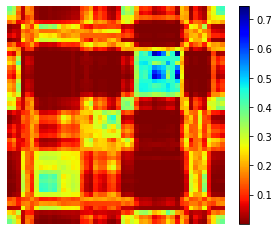

In [10]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
_, mappable_image = plot.plot_markov_transition_field(mtf=tag_mtf[0], ax=ax, reversed_cmap=True)
plt.colorbar(mappable_image)